$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Project Proposal for CS445

Daniel Reynolds and Zachary Fuchs

## Introduction

### Electronic Speed control of a DC motor for an RC car.

Our project would build upon an issue that was encountered had while Daniel was creating a self-driving RC car in CS440. Basically, controlling the speed of a motor on a RC car (or any DC motor under dynamic load) is not solvable by directly setting a consitent voltage to the vehicle. Voltage is not directly proportional to speed. See the following chart from [Aspina](https://us.aspina-group.com/en/learning-zone/columns/what-is/011/).

<br/>
<img src="https://us.aspina-group.com/en/learning-zone/columns/img/img-columns-what-is-011-01.jpg" style="width:600px;height:300px;">
<br/>

As you can see, there is a linear association between voltage, torque (load), and speed. So to set speed whilst under a given load, a certain voltage must be applied to the motor.  Luckily, directly controlling the voltage that goes into an electric motor is very easy via [Pulse-width modulation](https://en.wikipedia.org/wiki/Pulse-width_modulation). 

<br/>

#### Dynamic Load
The real problem is dynamic load. In the context of a vehicle, we can see that we are almost never travelling in a straight line with constant friction, under contant load. A vehicle which is driving in almost any real-world environent is under dynamic load, as changes in the friction of the ground, temperature, and other parameters contantly affect the load. 

#### Controllable Speed
Another goal here is to be able to directly control the speed of the motor. This means that we must deal with the interaction between a desired speed and a dynamic load.  

So we are left with a deeply nonlinear problem. Sounds like the perfect place for ML.

## Methods

We'd like to do this project because it applies Machine Learning to a real-world problem that is consistently encountered. Furthermore, current electronic speed control is currently solved with what we feel are methodologies too complex and convoluted to be understood without a deep understanding of physics and electrical engineering. Finally, playing with robots is fun and will keep us engaged with the problem.

### Steps to complete

#### Vehicle & Code

This is one of the simpler parts of this project, as I have all of the server/client code pre-written and have a very simple strategy to get the vehicle working. The brain of the operation will be a Raspberry PI connected to wifi. This component will interface with the motor controllers and external streams to properly control the vehicle. 

#### Data Collection

Once the server/client relationship is set up with the vehicle, an Xbox controller will be used to control it. For basic labeled data collection, state of the car at many timesteps will be logged to a CSV. 

#### Investigation of Supervised Learning Approach & Creation of RNN

Once the data is collected, a simple supervised learning approach will be attempted (see below). This step will also be where the network is created and ironed out. 

#### Test Supervised Learning Approach in Real Life

Simply observing the flaws with the pure supervised learning approach should show us the flaws and advantages of such a setup.

#### Optional: Reinforcement Learning Approach

Seeing that we should have a fairly competent model at this point, we can do some reinforcement learning that tries to minimize the difference between the actual and desired speed.

### The Model

We propose an end-to-end machine-learning based solution to this problem, in which the model would look something like this.

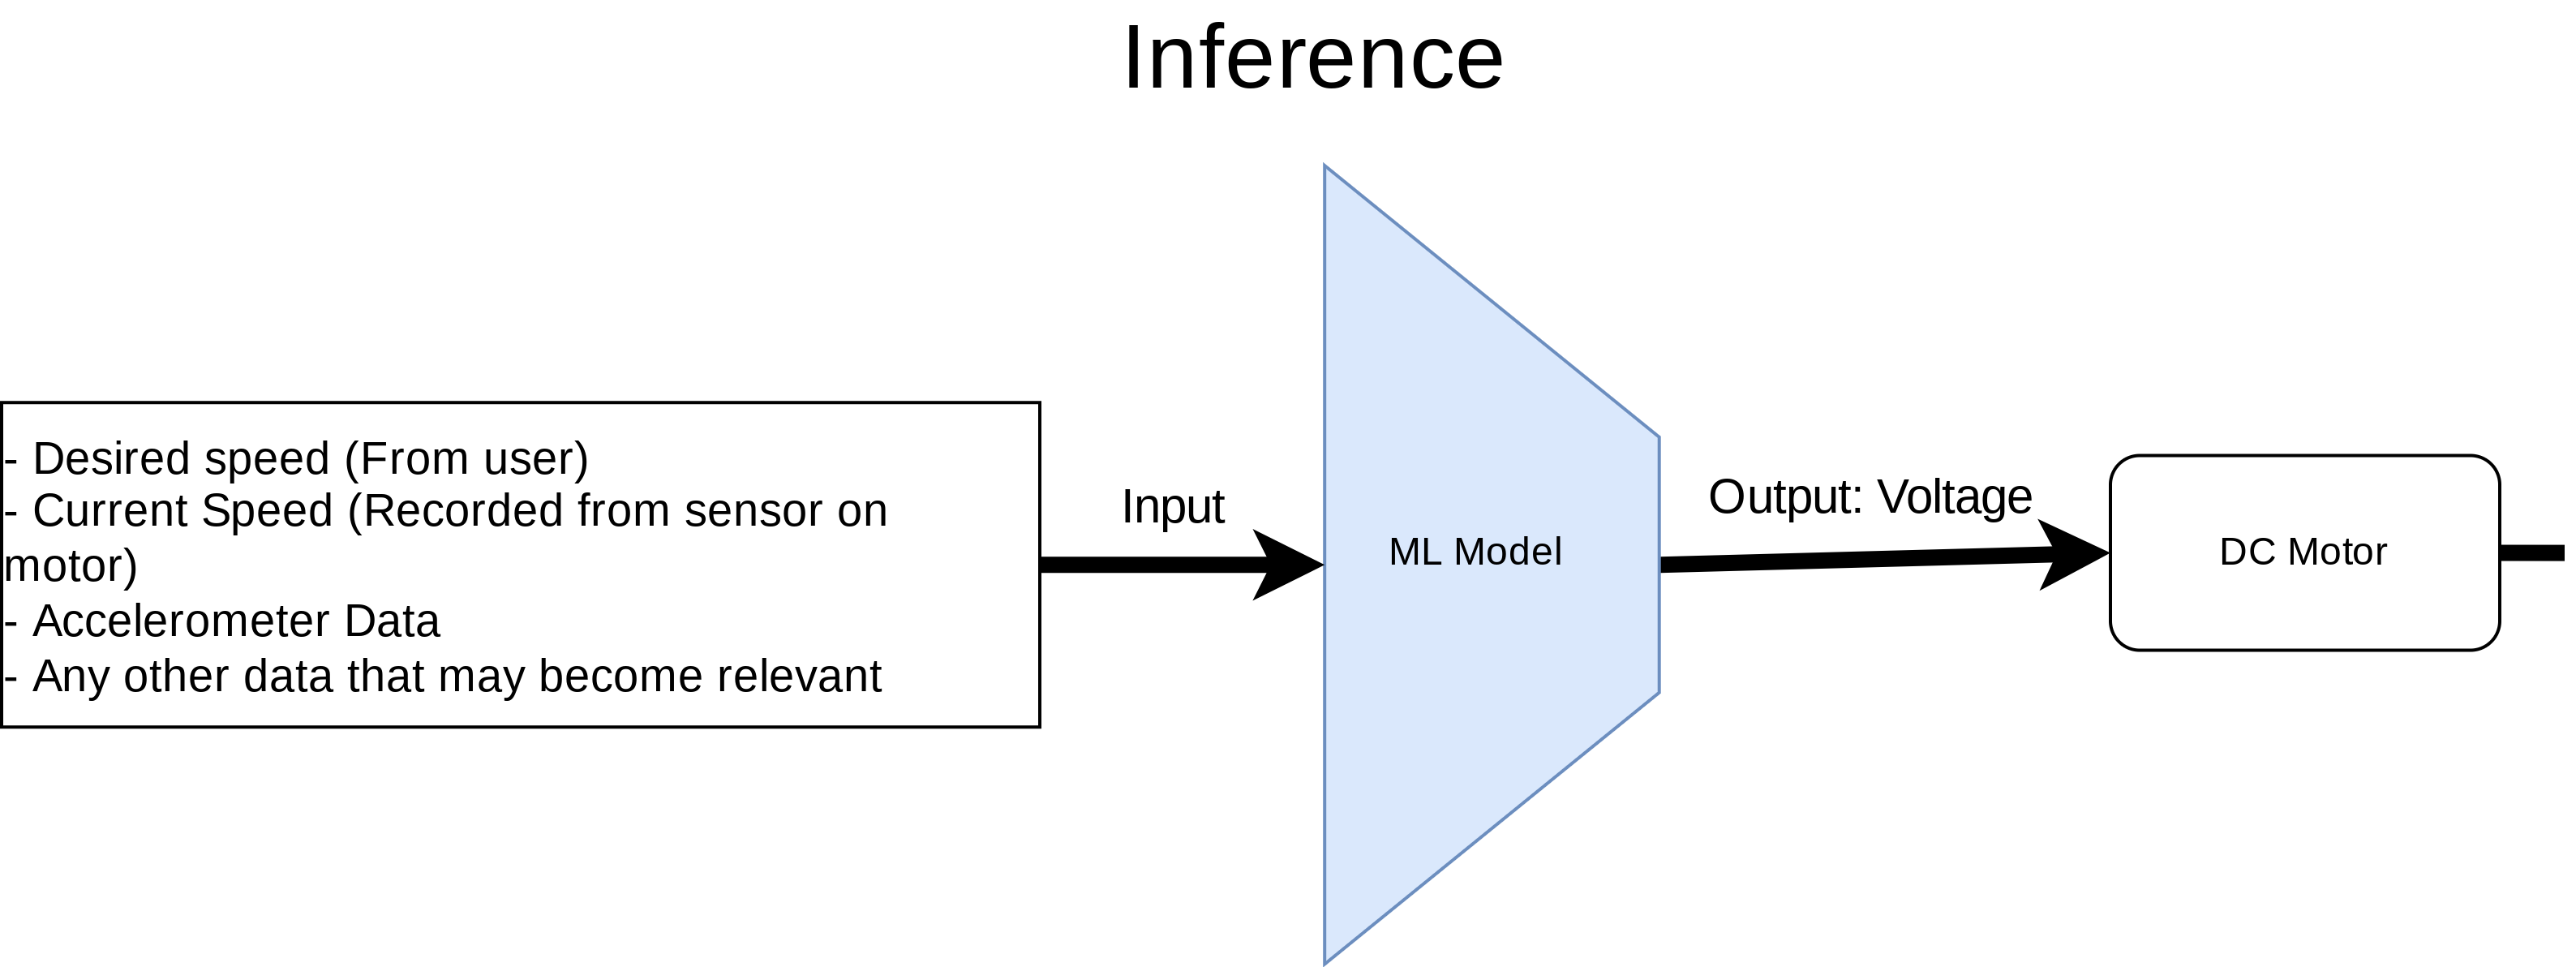

This model would likely be some sort of RNN. The environment that this vehicle would be navigating through is deeply  nonlinear, so a neural network is an easy choice here. Furthermore, it is clear that some amount of previous state could be useful for things like the desired/current speed and accelerometer data.

## Data Collection & Training

### Supervised Learning Approach

Due to the end-to-end nature of this solution, collecting data will be very straightforward. Ideally, a user simply drives the vehicle around varying environments whilst directly controlling the voltage of the motor. At fixed timesteps, the following data will be collected:

- Timestamp
- Current Voltage
- Actual Speed
- Desired Speed (This is the actual speed from $n$ timesteps ago)
- Accelerometer Data
- Any other data that may become relevant

The model would then be trained 
This is fairly straightforward, and I hypothesize that it will work. However, the fact that the "Desired Speed" is simply the actual speed from $n$ timesteps before is slightly flawed. It is an invariant that basically encodes how long a desired action becomes the actual state of the model.

This solution has some great advantages though, mainly that the vehicle can simply be driven around randomly and plenty of data will be collected.

### Reinforcement Learning Approach

It is clear that there is a reinforcement learning approach that can be taken here. How well the model is doing can easily be expressed as the difference between the actual speed and the desired speed.

## Possible Results



It is likely that a very simple model will work well for this problem. As can be seen, the solution to the problem under consistent load is linear, which means a linear regression model could do pretty well. Given dynamic load though (maybe we could add weight to the vehicle) the problem becomes increasingly complicated. This is where larger reccurrent models and reinforcement learning come into play.

## Timeline

Make a list with at least four entries with dates and describe what each team member will accomplish by these dates.  This is for your use.  Your grade will not depend on meeting these deadlines.

- Deadline 1: Controllable Vehicle w/ Server and Datalogging -- Friday April 8th
- Deadline 2: Supervised Learning approach attempt -- Friday April 15th
- Deadline 3: Reinforcement Learning Approach researched and started -- Friday April 22nd
- Deadline 4: Finished product -- End of April